<a href="https://colab.research.google.com/github/marcelarodriguez182/Final-Project-Phyton-2025/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Upload the dataset from my laptop
from google.colab import files
upload = files.upload()

# Read the CSV file
df = pd.read_csv("flower_exports_2024.csv")

# Display the first few rows of the DataFrame
df.head()

# Display all columns with their data types
df.info()

Saving flower_exports_2024.csv to flower_exports_2024.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Export_ID                                      660 non-null    object 
 1   Flower_Type                                    660 non-null    object 
 2   Variety                                        660 non-null    object 
 3   Export_Date                                    659 non-null    object 
 4   Country_Origin                                 660 non-null    object 
 5   Destination_Country                            660 non-null    object 
 6   Quantity_Tons                                  660 non-null    int64  
 7   Unit_Price_USD                                 660 non-null    float64
 8   Total_Value(
16 / 5,000
thousands of dollars)  660 non-null    float64
 

In [2]:
# DATA CLEAN

# Check for missing values
print(df.isnull().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Convert the 'Export_Date' column to datetime format
df["Export_Date"] = pd.to_datetime(df["Export_Date"], errors="coerce")

# Review the data types of all columns
df.info()


Export_ID                                          0
Flower_Type                                        0
Variety                                            0
Export_Date                                        1
Country_Origin                                     0
Destination_Country                                0
Quantity_Tons                                      0
Unit_Price_USD                                     0
Total_Value(\n16 / 5,000\nthousands of dollars)    0
Shipment_Method                                    0
Transport_Company                                  0
Transit_Days                                       0
Packaging_Type                                     0
Temperature_Celsius                                0
Humidity_Percent                                   0
Quality_Grade                                      0
US_Destination_City                                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (

In [3]:
#In the Export_Data column there is a missing value, with the fillna() function fill the missing value with the date 2024-01-01

df["Export_Date"] = df["Export_Date"].fillna("2024-01-01")

# Display all column names
print("List of all columns in the dataset:")
for col in df.columns:
    print(repr(col))



List of all columns in the dataset:
'Export_ID'
'Flower_Type'
'Variety'
'Export_Date'
'Country_Origin'
'Destination_Country'
'Quantity_Tons'
'Unit_Price_USD'
'Total_Value(\n16 / 5,000\nthousands of dollars)'
'Shipment_Method'
'Transport_Company'
'Transit_Days'
'Packaging_Type'
'Temperature_Celsius'
'Humidity_Percent'
'Quality_Grade'
'US_Destination_City'


In [4]:
# Clean column name

#While sorting the data, I noticed that the "Total Value" column was incorrectly labeled. Consequently, I decided to rename it for clarity

# Rename the messy column to a clean name
df.rename(columns={'Total_Value(\n16 / 5,000\nthousands of dollars)': 'Total_Value_USD'}, inplace=True)

# Confirm the change
print("Column renamed successfully!")
print(df.columns.tolist())

print("Column names in your DataFrame:")
for col in df.columns:
    print(repr(col))


Column renamed successfully!
['Export_ID', 'Flower_Type', 'Variety', 'Export_Date', 'Country_Origin', 'Destination_Country', 'Quantity_Tons', 'Unit_Price_USD', 'Total_Value_USD', 'Shipment_Method', 'Transport_Company', 'Transit_Days', 'Packaging_Type', 'Temperature_Celsius', 'Humidity_Percent', 'Quality_Grade', 'US_Destination_City']
Column names in your DataFrame:
'Export_ID'
'Flower_Type'
'Variety'
'Export_Date'
'Country_Origin'
'Destination_Country'
'Quantity_Tons'
'Unit_Price_USD'
'Total_Value_USD'
'Shipment_Method'
'Transport_Company'
'Transit_Days'
'Packaging_Type'
'Temperature_Celsius'
'Humidity_Percent'
'Quality_Grade'
'US_Destination_City'


In [5]:
# DATA MANIPULATE

# SORTING.

# Sort the dataset by quantity, unit price, total value, temperature, and humidity (all descending)

df_sorted = df.sort_values(
    by=["Quantity_Tons", "Unit_Price_USD", "Total_Value_USD", "Temperature_Celsius", "Humidity_Percent"],
    ascending=[False,False, False,False,False]
)

# Display confirmation and first 10 sorted rows
print("Dataset sorted from highest to lowest by quantity, price, value, temperature, and humidity.")
df_sorted.head(10)


Dataset sorted from highest to lowest by quantity, price, value, temperature, and humidity.


,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
28,EXP0029,Chrysanthemum,Pink,2024-02-02,Colombia,USA,4990,2.20,10978.00,Sea,Local Exporter,3,Plastic Wrap,5.2,53.4,B,"Los Angeles, CA"
20,EXP0021,Tulip,Yellow,2024-10-16,Colombia,USA,4988,4.80,23942.40,Sea,Local Exporter,5,Plastic Wrap,3.0,81.5,A,"Miami, FL"
305,EXP0306,Alstroemeria,Yellow,2024-03-22,Colombia,USA,4986,3.80,18946.80,Sea,FedEx,4,Plastic Wrap,4.2,62.2,B,"Dallas, TX"
51,EXP0052,Chrysanthemum,Yellow,2024-06-01,Colombia,USA,4976,2.33,11594.08,Sea,UPS,2,Crate,4.5,69.0,B,"Los Angeles, CA"
417,EXP0418,Alstroemeria,Yellow,2024-08-14,Colombia,USA,4968,1.36,6756.48,Sea,UPS,6,Plastic Wrap,2.9,84.6,B,"Los Angeles, CA"
83,EXP0084,Chrysanthemum,Pink,2024-02-18,Colombia,USA,4968,0.86,4272.48,Sea,DHL,5,Crate,3.4,56.7,C,"Los Angeles, CA"
196,EXP0197,Carnation,Orange,2024-01-01,Colombia,USA,4933,3.84,18942.72,Sea,FedEx,10,Box,4.2,78.6,C,"Los Angeles, CA"
109,EXP0110,Chrysanthemum,White,2024-09-07,Colombia,USA,4914,2.18,10712.52,Air,FedEx,3,Box,4.0,66.2,A,"New York, NY"
321,EXP0322,Chrysanthemum,Yellow,2024-12-16,Colombia,USA,4911,1.60,7857.60,Sea,FedEx,5,Plastic Wrap,8.0,82.5,A,"New York, NY"
106,EXP0107,Carnation,White,2024-02-18,Colombia,USA,4904,4.01,19665.04,Sea,Local Exporter,7,Box,7.4,83.9,B,"New York, NY"


In [6]:
# Which countries export the most expensive flowers in terms of unit price?

df.sort_values(by="Unit_Price_USD", ascending=False)


,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
656,EXP-2024-0157,Rose,Avalanche,2024-10-08,Mexico,United States,1725,9.99,17232.75,Air,Aeroméxico Cargo,1,Sleeved Box,3.7,90.0,Premium,"Miami, FL"
629,EXP-2024-0130,Rose,Avalanche,2024-05-24,Mexico,United States,752,9.96,7489.92,Air,Aeroméxico Cargo,2,Ventilated Box,2.6,94.0,A,"Miami, FL"
528,EXP-2024-0029,Rose,Pink Floyd,2024-10-10,Ecuador,United States,727,9.73,7073.71,Air,LATAM Cargo,3,Plastic Crate,1.0,86.0,Export,"Atlanta, GA"
584,EXP-2024-0085,Rose,Upper Class,2024-01-08,Kenya,United States,676,9.41,6361.16,Air,Emirates SkyCargo,3,Plastic Crate,4.0,92.0,A,"New York, NY"
503,EXP-2024-0004,Rose,Freedom,2024-03-04,Ecuador,United States,1530,9.31,14244.30,Air,Emirates SkyCargo,3,Ventilated Box,2.9,85.0,Premium,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,EXP0122,Chrysanthemum,Orange,2024-06-10,Colombia,USA,1579,0.54,852.66,Sea,Local Exporter,9,Plastic Wrap,5.9,72.1,A,"Miami, FL"
498,EXP0499,Alstroemeria,Orange,2024-07-19,Colombia,USA,2077,0.53,1100.81,Sea,FedEx,4,Crate,4.9,53.1,A,"New York, NY"
317,EXP0318,Rose,White,2024-05-13,Colombia,USA,4083,0.52,2123.16,Air,UPS,6,Crate,4.0,54.0,A,"Miami, FL"
463,EXP0464,Chrysanthemum,Pink,2024-03-25,Colombia,USA,3371,0.51,1719.21,Sea,UPS,8,Plastic Wrap,2.4,54.1,B,"Miami, FL"


In [7]:
#Which country has the largest shipment volume in tons?

df.sort_values(by=["Country_Origin", "Quantity_Tons"], ascending=[True, False])



,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
28,EXP0029,Chrysanthemum,Pink,2024-02-02,Colombia,USA,4990,2.20,10978.00,Sea,Local Exporter,3,Plastic Wrap,5.2,53.4,B,"Los Angeles, CA"
20,EXP0021,Tulip,Yellow,2024-10-16,Colombia,USA,4988,4.80,23942.40,Sea,Local Exporter,5,Plastic Wrap,3.0,81.5,A,"Miami, FL"
305,EXP0306,Alstroemeria,Yellow,2024-03-22,Colombia,USA,4986,3.80,18946.80,Sea,FedEx,4,Plastic Wrap,4.2,62.2,B,"Dallas, TX"
51,EXP0052,Chrysanthemum,Yellow,2024-06-01,Colombia,USA,4976,2.33,11594.08,Sea,UPS,2,Crate,4.5,69.0,B,"Los Angeles, CA"
83,EXP0084,Chrysanthemum,Pink,2024-02-18,Colombia,USA,4968,0.86,4272.48,Sea,DHL,5,Crate,3.4,56.7,C,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,EXP-2024-0064,Lily,Siberia,2024-04-08,Netherlands,United States,590,6.01,3545.90,Air,DHL Aviation,1,Plastic Crate,1.0,88.0,A,"New York, NY"
544,EXP-2024-0045,Tulip,Strong Gold,2024-12-07,Netherlands,United States,535,4.20,2247.00,Air,Aeroméxico Cargo,2,Sleeved Box,1.5,86.0,A+,"Los Angeles, CA"
549,EXP-2024-0050,Lily,Casa Blanca,2024-04-22,Netherlands,United States,484,7.15,3460.60,Air,Kenya Airways Cargo,2,Sleeved Box,3.4,94.0,Export,"Los Angeles, CA"
579,EXP-2024-0080,Gerbera,Jaguar,2024-09-04,Netherlands,United States,447,5.74,2565.78,Air,Avianca Cargo,2,Ventilated Box,3.4,93.0,Premium,"Miami, FL"


In [8]:
# Which country had the highest total value in its exports?
df.sort_values(by=["Country_Origin", "Total_Value_USD"], ascending=[True, False])


,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
20,EXP0021,Tulip,Yellow,2024-10-16,Colombia,USA,4988,4.80,23942.40,Sea,Local Exporter,5,Plastic Wrap,3.0,81.5,A,"Miami, FL"
456,EXP0457,Rose,Orange,2024-01-11,Colombia,USA,4774,4.95,23631.30,Air,FedEx,10,Crate,6.6,89.5,C,"Miami, FL"
191,EXP0192,Carnation,Yellow,2024-11-08,Colombia,USA,4787,4.86,23264.82,Sea,DHL,6,Crate,3.9,68.2,A,"Los Angeles, CA"
182,EXP0183,Carnation,Orange,2024-05-08,Colombia,USA,4660,4.92,22927.20,Air,UPS,9,Plastic Wrap,2.2,75.6,A,"Miami, FL"
258,EXP0259,Chrysanthemum,White,2024-10-22,Colombia,USA,4786,4.70,22494.20,Air,DHL,3,Plastic Wrap,6.0,63.8,C,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,EXP-2024-0052,Gerbera,Bolero,2024-07-13,Netherlands,United States,784,4.29,3363.36,Air,KLM Cargo,2,Sleeved Box,2.2,92.0,A,"New York, NY"
552,EXP-2024-0053,Chrysanthemum,Baltica,2024-08-28,Netherlands,United States,708,4.47,3164.76,Air,Kenya Airways Cargo,1,Corrugated Box,4.3,91.0,A,"New York, NY"
574,EXP-2024-0075,Lily,Stargazer,2024-06-19,Netherlands,United States,358,7.54,2699.32,Sea,CMA CGM,13,Sleeved Box,2.0,86.0,A+,"Miami, FL"
579,EXP-2024-0080,Gerbera,Jaguar,2024-09-04,Netherlands,United States,447,5.74,2565.78,Air,Avianca Cargo,2,Ventilated Box,3.4,93.0,Premium,"Miami, FL"


In [9]:
# Which flowers have the highest unit price?

df.sort_values(by=["Flower_Type", "Unit_Price_USD"], ascending=[True, False])



,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
532,EXP-2024-0033,Alstroemeria,Inca Ice,2024-10-13,Ecuador,United States,893,7.15,6384.95,Sea,Maersk,11,Ventilated Box,1.4,88.0,Premium,"Miami, FL"
527,EXP-2024-0028,Alstroemeria,Candy,2024-12-26,Ecuador,United States,1024,7.08,7249.92,Sea,Maersk,13,Sleeved Box,1.7,87.0,A+,"Seattle, WA"
510,EXP-2024-0011,Alstroemeria,Regina,2024-11-24,Ecuador,United States,763,6.38,4867.94,Sea,Maersk,15,Sleeved Box,1.2,93.0,Premium,"Miami, FL"
538,EXP-2024-0039,Alstroemeria,Inca Ice,2024-09-16,Ecuador,United States,564,6.18,3485.52,Air,Emirates SkyCargo,2,Sleeved Box,3.2,86.0,Premium,"Dallas, TX"
523,EXP-2024-0024,Alstroemeria,Candy,2024-02-11,Ecuador,United States,545,5.76,3139.20,Air,Aeroméxico Cargo,3,Plastic Crate,3.9,87.0,A,"Miami, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,EXP0016,Tulip,White,2024-01-21,Colombia,USA,1969,0.70,1378.30,Air,UPS,9,Box,2.4,55.0,B,"Chicago, IL"
415,EXP0416,Tulip,White,2024-03-28,Colombia,USA,1813,0.69,1250.97,Sea,DHL,10,Box,2.4,53.3,C,"Atlanta, GA"
155,EXP0156,Tulip,Yellow,2024-06-23,Colombia,USA,2146,0.62,1330.52,Air,UPS,6,Box,7.6,70.5,C,"Dallas, TX"
44,EXP0045,Tulip,Pink,2024-07-16,Colombia,USA,635,0.58,368.30,Air,DHL,6,Crate,5.2,84.1,B,"New York, NY"


In [10]:
# Which sea shipments had the longest transit time?

df[df["Shipment_Method"] == "Sea"].sort_values(by="Transit_Days", ascending=False)


,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
595,EXP-2024-0096,Carnation,Tanga,2024-02-08,Kenya,United States,537,6.40,3436.80,Sea,CMA CGM,25,Plastic Crate,1.6,90.0,Premium,"Miami, FL"
594,EXP-2024-0095,Carnation,Sim,2024-09-28,Kenya,United States,782,5.74,4488.68,Sea,Hapag-Lloyd,23,Sleeved Box,1.4,87.0,Premium,"Chicago, IL"
611,EXP-2024-0112,Carnation,Dianthus Barbatus,2024-03-07,Kenya,United States,889,3.77,3351.53,Sea,Maersk,23,Corrugated Box,1.2,91.0,A,"New York, NY"
599,EXP-2024-0100,Rose,Explorer,2024-12-09,Kenya,United States,827,5.94,4912.38,Sea,Maersk,23,Ventilated Box,2.8,87.0,A+,"Seattle, WA"
592,EXP-2024-0093,Rose,Red Naomi,2024-04-22,Kenya,United States,702,9.25,6493.50,Sea,CMA CGM,23,Plastic Crate,2.8,88.0,Premium,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,EXP0030,Chrysanthemum,Yellow,2024-06-14,Colombia,USA,4528,2.59,11727.52,Sea,Local Exporter,2,Crate,5.8,62.4,B,"Chicago, IL"
484,EXP0485,Carnation,Pink,2024-09-23,Colombia,USA,295,4.88,1439.60,Sea,UPS,2,Plastic Wrap,4.1,56.0,C,"Los Angeles, CA"
39,EXP0040,Tulip,Orange,2024-05-05,Colombia,USA,4122,4.34,17889.48,Sea,Local Exporter,2,Plastic Wrap,2.6,87.3,C,"Los Angeles, CA"
51,EXP0052,Chrysanthemum,Yellow,2024-06-01,Colombia,USA,4976,2.33,11594.08,Sea,UPS,2,Crate,4.5,69.0,B,"Los Angeles, CA"


In [11]:
# Which air shipments had the longest transit time?
df[df["Shipment_Method"] == "Air"].sort_values(by="Transit_Days", ascending=False)



,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
491,EXP0492,Carnation,Orange,2024-05-01,Colombia,USA,361,4.84,1747.24,Air,UPS,10,Crate,6.5,74.6,B,"Los Angeles, CA"
467,EXP0468,Carnation,Red,2024-10-24,Colombia,USA,678,3.53,2393.34,Air,DHL,10,Plastic Wrap,7.4,89.0,A,"New York, NY"
456,EXP0457,Rose,Orange,2024-01-11,Colombia,USA,4774,4.95,23631.30,Air,FedEx,10,Crate,6.6,89.5,C,"Miami, FL"
455,EXP0456,Carnation,Orange,2024-08-15,Colombia,USA,3341,3.76,12562.16,Air,FedEx,10,Box,2.6,79.7,B,"Los Angeles, CA"
458,EXP0459,Tulip,Yellow,2024-10-20,Colombia,USA,4428,4.95,21918.60,Air,UPS,10,Crate,4.8,84.4,C,"Miami, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,EXP-2024-0144,Rose,Cherry Brandy,2024-09-25,Mexico,United States,957,5.51,5273.07,Air,Kenya Airways Cargo,1,Sleeved Box,1.9,94.0,A+,"Los Angeles, CA"
577,EXP-2024-0078,Tulip,Queen of Night,2024-05-27,Netherlands,United States,808,6.50,5252.00,Air,Aeroméxico Cargo,1,Ventilated Box,3.5,88.0,A,"Miami, FL"
654,EXP-2024-0155,Lily,Asiatic Orange,2024-04-05,Mexico,United States,994,6.59,6550.46,Air,Emirates SkyCargo,1,Ventilated Box,3.1,88.0,Export,"Miami, FL"
656,EXP-2024-0157,Rose,Avalanche,2024-10-08,Mexico,United States,1725,9.99,17232.75,Air,Aeroméxico Cargo,1,Sleeved Box,3.7,90.0,Premium,"Miami, FL"


In [12]:
#Which country exports were carried out under the best conditions, specifically with moderate temperatures and stable humidity?

df.sort_values(by=["Temperature_Celsius", "Humidity_Percent"], ascending=[True, True])




,Export_ID,Flower_Type,Variety,Export_Date,Country_Origin,Destination_Country,Quantity_Tons,Unit_Price_USD,Total_Value_USD,Shipment_Method,Transport_Company,Transit_Days,Packaging_Type,Temperature_Celsius,Humidity_Percent,Quality_Grade,US_Destination_City
516,EXP-2024-0017,Gypsophila,Million Star,2024-01-17,Ecuador,United States,629,4.77,3000.33,Air,American Airlines Cargo,1,Sleeved Box,0.5,95.0,A,"Chicago, IL"
586,EXP-2024-0087,Hypericum,Magical Pumpkin,2024-05-27,Kenya,United States,1236,7.55,9331.80,Air,Aeroméxico Cargo,4,Plastic Crate,0.6,86.0,A,"Miami, FL"
501,EXP-2024-0002,Rose,Freedom,2024-10-06,Ecuador,United States,855,7.77,6643.35,Air,American Airlines Cargo,3,Ventilated Box,0.6,88.0,Premium,"Miami, FL"
534,EXP-2024-0035,Alstroemeria,Candy,2024-06-28,Ecuador,United States,1197,5.34,6391.98,Air,LATAM Cargo,2,Sleeved Box,0.7,92.0,A,"Seattle, WA"
566,EXP-2024-0067,Lily,Casa Blanca,2024-07-24,Netherlands,United States,875,5.74,5022.50,Air,Emirates SkyCargo,1,Ventilated Box,0.7,92.0,A,"Dallas, TX"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,EXP0232,Chrysanthemum,Red,2024-09-25,Colombia,USA,3914,3.45,13503.30,Air,FedEx,9,Box,8.0,56.2,C,"Los Angeles, CA"
195,EXP0196,Carnation,Red,2024-06-21,Colombia,USA,3267,2.60,8494.20,Sea,FedEx,3,Box,8.0,69.6,A,"Miami, FL"
284,EXP0285,Carnation,Pink,2024-09-25,Colombia,USA,3007,1.19,3578.33,Sea,FedEx,3,Crate,8.0,79.1,B,"New York, NY"
321,EXP0322,Chrysanthemum,Yellow,2024-12-16,Colombia,USA,4911,1.60,7857.60,Sea,FedEx,5,Plastic Wrap,8.0,82.5,A,"New York, NY"


In [13]:
# FILTERING

# Which country exported more than 1,000 tons of flowers?

large_exports = df[df["Quantity_Tons"] > 1000]
print("Shipments with more than 1,000 tons:")
print(large_exports.head())


Shipments with more than 1,000 tons:
  Export_ID    Flower_Type Variety Export_Date Country_Origin  \
0   EXP0001   Alstroemeria   White  2024-11-27       Colombia   
2   EXP0003  Chrysanthemum  Orange  2024-04-18       Colombia   
3   EXP0004          Tulip   White  2024-09-08       Colombia   
4   EXP0005  Chrysanthemum    Pink  2024-01-18       Colombia   
5   EXP0006   Alstroemeria    Pink  2024-01-23       Colombia   

  Destination_Country  Quantity_Tons  Unit_Price_USD  Total_Value_USD  \
0                 USA           4686            4.10         19212.60   
2                 USA           2007            3.00          6021.00   
3                 USA           3525            1.98          6979.50   
4                 USA           4091            4.97         20332.27   
5                 USA           2282            0.86          1962.52   

  Shipment_Method Transport_Company  Transit_Days Packaging_Type  \
0             Air               UPS             6   Plastic Wrap 

In [14]:
# Which exports exceeded $500,000 in total value?

high_value = df[df["Total_Value_USD"] > 500.000]
print("High-value shipments (over $500K):")
print(high_value.head())


High-value shipments (over $500K):
  Export_ID    Flower_Type Variety Export_Date Country_Origin  \
0   EXP0001   Alstroemeria   White  2024-11-27       Colombia   
1   EXP0002      Carnation  Yellow  2024-10-20       Colombia   
2   EXP0003  Chrysanthemum  Orange  2024-04-18       Colombia   
3   EXP0004          Tulip   White  2024-09-08       Colombia   
4   EXP0005  Chrysanthemum    Pink  2024-01-18       Colombia   

  Destination_Country  Quantity_Tons  Unit_Price_USD  Total_Value_USD  \
0                 USA           4686            4.10         19212.60   
1                 USA            930            0.76           706.80   
2                 USA           2007            3.00          6021.00   
3                 USA           3525            1.98          6979.50   
4                 USA           4091            4.97         20332.27   

  Shipment_Method Transport_Company  Transit_Days Packaging_Type  \
0             Air               UPS             6   Plastic Wrap   

In [15]:
# Which flower types were shipped with humidity levels above 90%?

high_humidity_flowers = df[df["Humidity_Percent"] > 90]
print("Shipments with humidity above 90%:")
print(high_humidity_flowers.head())


Shipments with humidity above 90%:
         Export_ID Flower_Type       Variety Export_Date Country_Origin  \
500  EXP-2024-0001        Rose       Freedom  2024-02-14        Ecuador   
502  EXP-2024-0003  Gypsophila        Xlence  2024-04-20        Ecuador   
505  EXP-2024-0006        Rose      Explorer  2024-11-27        Ecuador   
506  EXP-2024-0007  Gypsophila  Million Star  2024-01-29        Ecuador   
508  EXP-2024-0009  Gypsophila        Xlence  2024-03-11        Ecuador   

    Destination_Country  Quantity_Tons  Unit_Price_USD  Total_Value_USD  \
500       United States           1068            6.50          6942.00   
502       United States           1126            5.28          5945.28   
505       United States            827            6.23          5152.21   
506       United States           1560            3.81          5943.60   
508       United States            761            5.24          3987.64   

    Shipment_Method        Transport_Company  Transit_Days  Pac

In [16]:
# GROUP BY

# Which flower type was exported the most (in tons)?
df.groupby("Flower_Type")["Quantity_Tons"].sum().sort_values(ascending=False)


,Quantity_Tons
Flower_Type,
Carnation,298739
Chrysanthemum,287892
Alstroemeria,279910
Rose,220646
Tulip,206337
Lily,19539
Hypericum,14675
Gerbera,11733
Eryngium,8765


In [17]:
# Which country exported the largest total quantity?
df.groupby("Country_Origin")["Quantity_Tons"].sum().sort_values(ascending=False)

,Quantity_Tons
Country_Origin,
Colombia,1216706
Kenya,37745
Mexico,37621
Netherlands,37436
Ecuador,35140


In [18]:
# What is the average total value per shipment method (Air vs Sea)?
df.groupby("Shipment_Method")["Total_Value_USD"].mean().sort_values(ascending=False)


,Total_Value_USD
Shipment_Method,
Sea,7004.276620
Air,6520.575871


In [19]:
# What is the average transport temperature by flower type?
df.groupby("Flower_Type")["Temperature_Celsius"].mean().sort_values()


,Temperature_Celsius
Flower_Type,
Gypsophila,2.255556
Lily,2.263636
Marigold,2.470000
Hypericum,2.535714
Eryngium,2.900000
Gerbera,2.969231
Rose,4.328182
Chrysanthemum,4.483478
Carnation,4.647857


In [20]:
# Which destination cities received the highest total flower tons?
df.groupby("US_Destination_City")["Quantity_Tons"].sum().sort_values(ascending=False)


,Quantity_Tons
US_Destination_City,
"Miami, FL",602680
"Los Angeles, CA",227739
"New York, NY",182583
"Chicago, IL",123169
"Dallas, TX",84787
"Atlanta, GA",73350
"Seattle, WA",39400
"Houston, TX",30940


In [21]:
# Which shipment method (Air or Sea) was most used by the five countries?

shipment_usage = df.groupby(["Country_Origin", "Shipment_Method"]).size().unstack().fillna(0)

print("Shipment method usage by each country:")
print(shipment_usage)

Shipment method usage by each country:
Shipment_Method  Air  Sea
Country_Origin           
Colombia         250  250
Ecuador           32    8
Kenya             32    8
Mexico            24   16
Netherlands       35    5


In [22]:
# MERGING

# SECOND DATASET: CONTINENT

import pandas as pd

# Create a small DataFrame with continent information
df_continent = pd.DataFrame({
    "Country_Origin": ["Colombia", "Ecuador", "Netherlands", "Kenya", "Mexico"],
    "Continent": ["South America", "South America", "Europe", "Africa", "North America"]
})

# Merge it with your main dataset
merged_df = pd.merge(df, df_continent, on="Country_Origin", how="left")

# Display the first rows
print("Merged dataset with continent information:")
print(merged_df.head())


Merged dataset with continent information:
  Export_ID    Flower_Type Variety Export_Date Country_Origin  \
0   EXP0001   Alstroemeria   White  2024-11-27       Colombia   
1   EXP0002      Carnation  Yellow  2024-10-20       Colombia   
2   EXP0003  Chrysanthemum  Orange  2024-04-18       Colombia   
3   EXP0004          Tulip   White  2024-09-08       Colombia   
4   EXP0005  Chrysanthemum    Pink  2024-01-18       Colombia   

  Destination_Country  Quantity_Tons  Unit_Price_USD  Total_Value_USD  \
0                 USA           4686            4.10         19212.60   
1                 USA            930            0.76           706.80   
2                 USA           2007            3.00          6021.00   
3                 USA           3525            1.98          6979.50   
4                 USA           4091            4.97         20332.27   

  Shipment_Method Transport_Company  Transit_Days Packaging_Type  \
0             Air               UPS             6   Plastic

In [23]:
# SAVE MERGED DATASET TO CSV FILE

merged_df.to_csv("flower_exports_2024_final.csv", index=False)
print("File saved successfully as 'flower_exports_2024_final.csv'")


File saved successfully as 'flower_exports_2024_final.csv'


In [24]:
# Download the new file

from google.colab import files
files.download("flower_exports_2024_final.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Which continent is the largest exporter of flowers?

merged_df.groupby("Continent")["Quantity_Tons"].sum().sort_values(ascending=False)


,Quantity_Tons
Continent,
South America,1251846
Africa,37745
North America,37621
Europe,37436


In [26]:
# Which continent has the highest total value of exports?

merged_df.groupby("Continent")["Total_Value_USD"].sum().sort_values(ascending=False)


,Total_Value_USD
Continent,
South America,3729243.01
North America,243295.03
Africa,242729.30
Europe,227134.85


In [27]:
# RESHAPING THE DATA

# PIVOT TABLE: FLOWER TYPE vs PACKAGING TYPE

pivot_flower_packaging = pd.pivot_table(
    merged_df,
    values="Quantity_Tons",
    index="Flower_Type",
    columns="Packaging_Type",
    aggfunc="sum",
    fill_value=0
)

print("Total tons exported by flower type and packaging type:")
print(pivot_flower_packaging)



Total tons exported by flower type and packaging type:
Packaging_Type     Box  Corrugated Box   Crate  Plastic Crate  Plastic Wrap  \
Flower_Type                                                                   
Alstroemeria    111411             810   75382            997         84927   
Carnation        97231            2945  101541           1137         86493   
Chrysanthemum    75763            8156   91990           4632        101627   
Eryngium             0             954       0           1848             0   
Gerbera              0            4945       0           1018             0   
Gypsophila           0             653       0           2917             0   
Hypericum            0            3864       0           1981             0   
Lily                 0            5222       0           1139             0   
Marigold             0            2730       0              0             0   
Rose             69863            5030   76990           3728         44872 

In [28]:
# Flower Type vs U.S. Destination City

# PIVOT TABLE: FLOWER TYPE vs U.S. DESTINATION CITY

pivot_flower_city = pd.pivot_table(
    merged_df,
    values="Quantity_Tons",
    index="Flower_Type",
    columns="US_Destination_City",
    aggfunc="sum",
    fill_value=0
)

print("Total tons exported by flower type and U.S. destination city:")
print(pivot_flower_city)


Total tons exported by flower type and U.S. destination city:
US_Destination_City  Atlanta, GA  Chicago, IL  Dallas, TX  Houston, TX  \
Flower_Type                                                              
Alstroemeria               12069        17326       20696         9383   
Carnation                  16677        24416       17674         7350   
Chrysanthemum               6660        48068       16774         8843   
Eryngium                       0            0           0            0   
Gerbera                        0          927        1005            0   
Gypsophila                     0          629         585            0   
Hypericum                      0         2102           0            0   
Lily                           0          805        3144         1299   
Marigold                    2936            0           0            0   
Rose                       21775         2873       11763            0   
Tulip                      13233        26023     

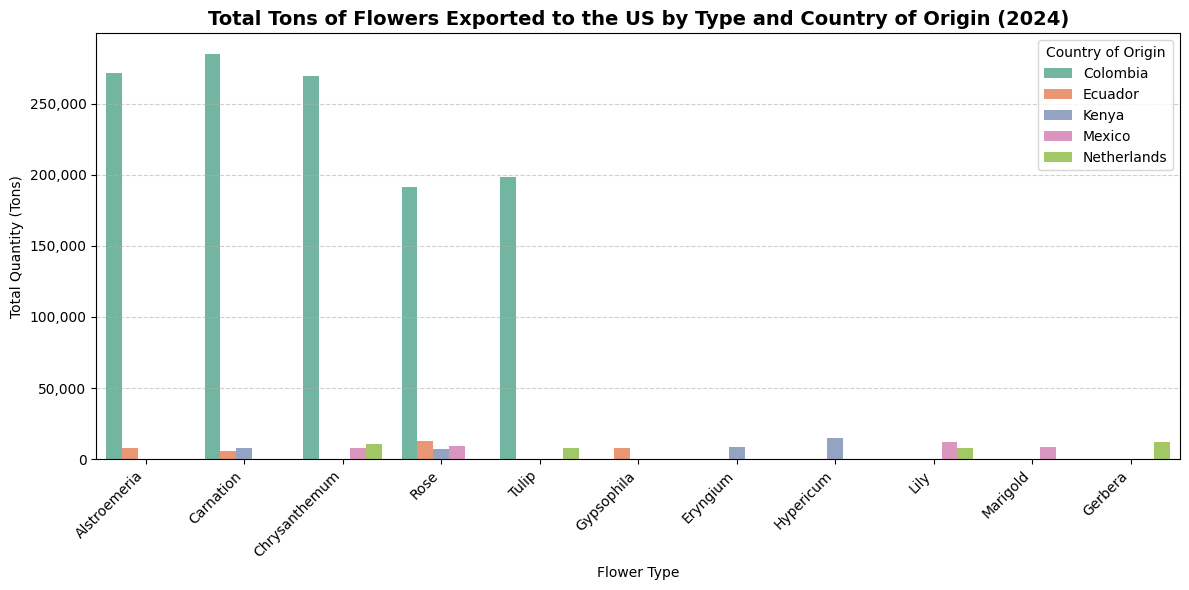

In [29]:
# 5. DATA VISUALIZATION

# Visualitation: flower type vs quantity tons vs country of origin


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Group the data by country and flower type, summing total tons
flower_country = merged_df.groupby(["Country_Origin", "Flower_Type"])["Quantity_Tons"].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=flower_country,
    x="Flower_Type",
    y="Quantity_Tons",
    hue="Country_Origin",
    palette="Set2"
)

# Format Y-axis numbers with thousand separators
formatter = FuncFormatter(lambda x, pos: f"{int(x):,}")
plt.gca().yaxis.set_major_formatter(formatter)

# Customize chart appearance
plt.title("Total Tons of Flowers Exported to the US by Type and Country of Origin (2024)", fontsize=14, fontweight="bold")
plt.xlabel("Flower Type")
plt.ylabel("Total Quantity (Tons)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Country of Origin")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Save the figure
plt.savefig("visualization_flower_type_country_.png", dpi=300)

# Display the plot
plt.show()



In [35]:
import plotly.graph_objects as go
import pandas as pd

# --- Group data ---
df_bubble = merged_df.groupby(["US_Destination_City", "Flower_Type"], as_index=False)["Quantity_Tons"].sum()

# --- Add coordinates ---
city_coords = {
    "Miami, FL": (25.7617, -80.1918),
    "New York, NY": (40.7128, -74.0060),
    "Los Angeles, CA": (34.0522, -118.2437),
    "Dallas, TX": (32.7767, -96.7970),
    "Chicago, IL": (41.8781, -87.6298),
    "Houston, TX": (29.7604, -95.3698),
    "Atlanta, GA": (33.7490, -84.3880),
    "Seattle, WA": (47.6062, -122.3321)
}

df_bubble["Latitude"] = df_bubble["US_Destination_City"].map(lambda x: city_coords.get(x, (0, 0))[0])
df_bubble["Longitude"] = df_bubble["US_Destination_City"].map(lambda x: city_coords.get(x, (0, 0))[1])

# --- ✅ Create hover text with thousand separators ---
df_bubble["text"] = (
    df_bubble["US_Destination_City"]
    + "<br>Flower: " + df_bubble["Flower_Type"]
    + "<br>Tons: " + df_bubble["Quantity_Tons"].apply(lambda x: f"{x:,.0f}")  # ← formatted number
)

# --- Create map ---
fig = go.Figure()

colors = [
    "crimson", "royalblue", "orange", "seagreen", "orchid",
    "gold", "lightseagreen", "violet", "salmon", "limegreen", "skyblue"
]

for i, flower in enumerate(df_bubble["Flower_Type"].unique()):
    df_sub = df_bubble[df_bubble["Flower_Type"] == flower]
    fig.add_trace(go.Scattergeo(
        locationmode="USA-states",
        lon=df_sub["Longitude"],
        lat=df_sub["Latitude"],
        text=df_sub["text"],
        marker=dict(
            size=df_sub["Quantity_Tons"] / 500,
            color=colors[i % len(colors)],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode='area',
            opacity=0.7
        ),
        name=flower
    ))

fig.update_layout(
    title_text="U.S. Flower Import Destinations (2024)<br>Bubble size = Total Tons Exported",
    showlegend=True,
    geo=dict(
        scope='usa',
        landcolor='rgb(230, 230, 230)',
        lakecolor='rgb(255, 255, 255)',
        showland=True,
        showlakes=True,
        subunitcolor='rgb(255, 255, 255)',
        countrycolor='rgb(255, 255, 255)',
    ),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()






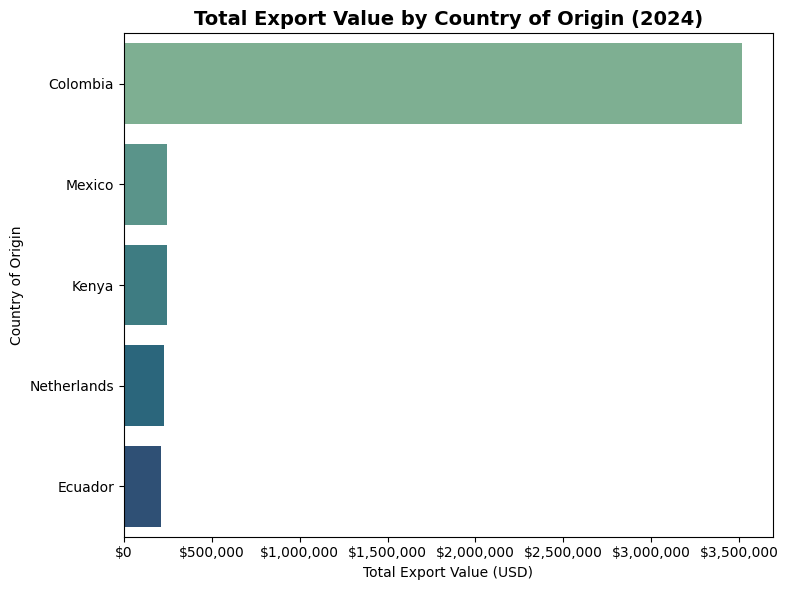

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data and sum total export value per country
country_value = merged_df.groupby("Country_Origin")["Total_Value_USD"].sum().sort_values(ascending=False)

# Convert to DataFrame
country_value_df = country_value.reset_index()

# Simple bar chart (modern Seaborn syntax)
plt.figure(figsize=(8,6))
sns.barplot(
    data=country_value_df,
    x="Total_Value_USD",
    y="Country_Origin",
    hue="Country_Origin",
    palette="crest",
    legend=False
)

# Optional: Format axis with thousand separators
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Titles and labels
plt.title("Total Export Value by Country of Origin (2024)", fontsize=14, fontweight="bold")
plt.xlabel("Total Export Value (USD)")
plt.ylabel("Country of Origin")

plt.tight_layout()
plt.show()





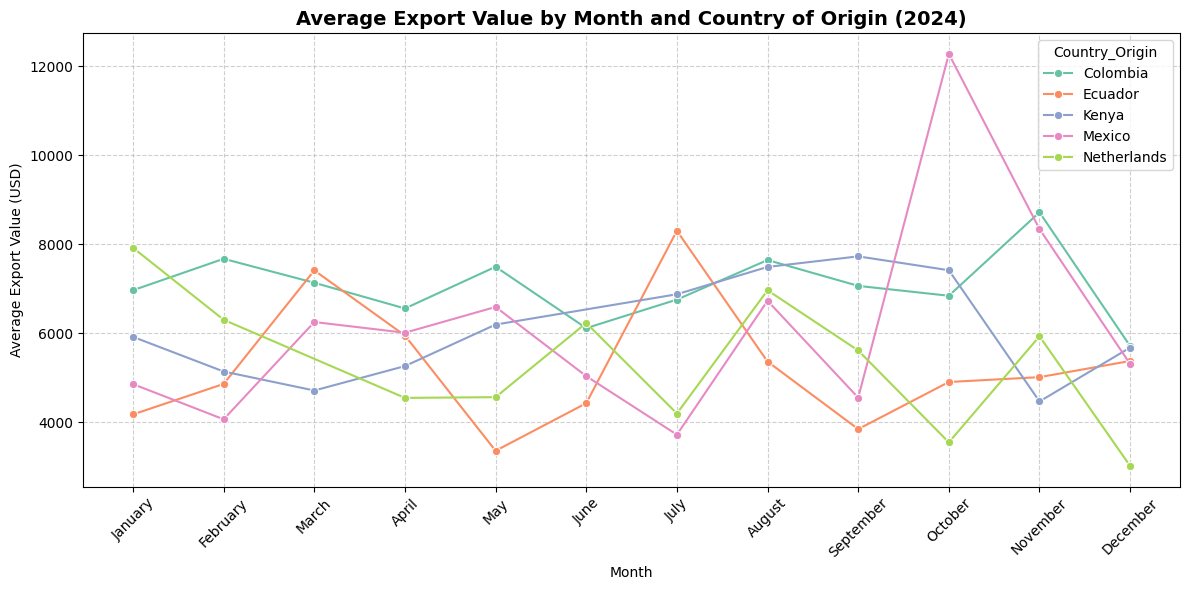

In [37]:
# Visualization: Average Export Value vs Month vs Country

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Convert Export_Date to datetime and extract month name
merged_df["Export_Date"] = pd.to_datetime(merged_df["Export_Date"], errors="coerce")
merged_df["Month"] = merged_df["Export_Date"].dt.month_name()

# Group by Month and Country_Origin and calculate average value
avg_export = (
    merged_df.groupby(["Month", "Country_Origin"])["Total_Value_USD"]
    .mean()
    .reset_index()
)

# Order months correctly
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
avg_export["Month"] = pd.Categorical(avg_export["Month"], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=avg_export,
    x="Month",
    y="Total_Value_USD",
    hue="Country_Origin",
    marker="o",
    palette="Set2"
)

# Customize the chart
plt.title("Average Export Value by Month and Country of Origin (2024)", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Average Export Value (USD)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Save and show
plt.savefig("visualization_avg_export_month_country.png", dpi=300)
plt.show()


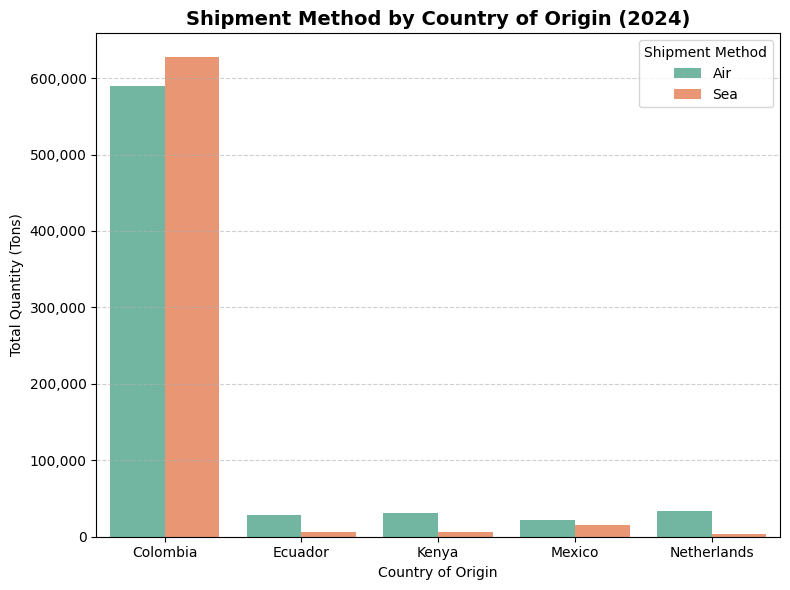

In [38]:
# Visualization: Shipment Method vs Country of Origin

import seaborn as sns
import matplotlib.pyplot as plt

# Group data
shipment_country = merged_df.groupby(["Country_Origin", "Shipment_Method"])["Quantity_Tons"].sum().reset_index()

# Create grouped bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=shipment_country, x="Country_Origin", y="Quantity_Tons", hue="Shipment_Method", palette="Set2")

# Thousand separator on Y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Titles and labels
plt.title("Shipment Method by Country of Origin (2024)", fontsize=14, fontweight="bold")
plt.xlabel("Country of Origin")
plt.ylabel("Total Quantity (Tons)")
plt.legend(title="Shipment Method")

# Grid and layout
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Save and show
plt.savefig("visualization_shipment_method_country.png", dpi=300)
plt.show()




In [39]:
# STATISTICAL ANALYSIS

# Descriptive Statistics

# Summary of numeric columns
stats_summary = merged_df.describe()

print("Descriptive Statistics Summary:")
print(stats_summary)


Descriptive Statistics Summary:
                         Export_Date  Quantity_Tons  Unit_Price_USD  \
count                            660     660.000000      660.000000   
mean   2024-06-26 05:38:10.909090816    2067.648485        3.668561   
min              2024-01-01 00:00:00     120.000000        0.500000   
25%              2024-03-26 18:00:00     863.500000        2.110000   
50%              2024-06-23 00:00:00    1545.000000        3.595000   
75%              2024-09-25 00:00:00    3298.000000        4.732500   
max              2024-12-31 00:00:00    4990.000000        9.990000   
std                              NaN    1407.237295        1.994765   

       Total_Value_USD  Transit_Days  Temperature_Celsius  Humidity_Percent  
count       660.000000    660.000000           660.000000         660.00000  
mean       6730.912409      5.560606             4.370000          74.32197  
min         175.560000      1.000000             0.500000          50.10000  
25%        3012.

In [40]:
# Measures of Central Tendency
mean_values = merged_df[["Quantity_Tons", "Unit_Price_USD", "Total_Value_USD"]].mean()
median_values = merged_df[["Quantity_Tons", "Unit_Price_USD", "Total_Value_USD"]].median()
mode_values = merged_df[["Quantity_Tons", "Unit_Price_USD", "Total_Value_USD"]].mode().iloc[0]

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)


Mean values:
 Quantity_Tons      2067.648485
Unit_Price_USD        3.668561
Total_Value_USD    6730.912409
dtype: float64

Median values:
 Quantity_Tons      1545.000
Unit_Price_USD        3.595
Total_Value_USD    5427.880
dtype: float64

Mode values:
 Quantity_Tons       727.00
Unit_Price_USD        1.36
Total_Value_USD    1229.58
Name: 0, dtype: float64


Correlation
                     Quantity_Tons  Unit_Price_USD  Total_Value_USD  \
Quantity_Tons             1.000000       -0.304825         0.716915   
Unit_Price_USD           -0.304825        1.000000         0.310147   
Total_Value_USD           0.716915        0.310147         1.000000   
Temperature_Celsius       0.280855       -0.345806         0.106614   
Humidity_Percent         -0.295928        0.479978        -0.062945   

                     Temperature_Celsius  Humidity_Percent  
Quantity_Tons                   0.280855         -0.295928  
Unit_Price_USD                 -0.345806          0.479978  
Total_Value_USD                 0.106614         -0.062945  
Temperature_Celsius             1.000000         -0.328578  
Humidity_Percent               -0.328578          1.000000  


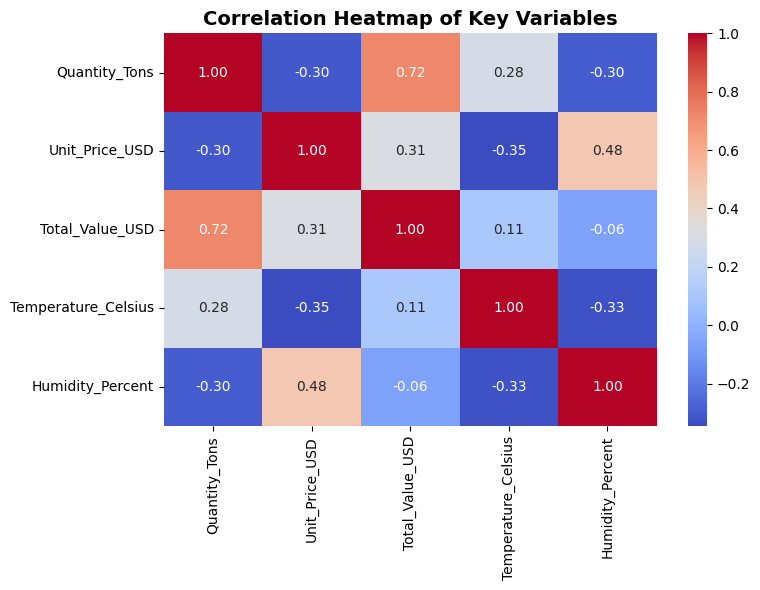

In [41]:
# Correlation
correlation = merged_df[[
    "Quantity_Tons",
    "Unit_Price_USD",
    "Total_Value_USD",
    "Temperature_Celsius",
    "Humidity_Percent"
]].corr()

print("Correlation")
print(correlation)

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("visualization_correlation_heatmap.png", dpi=300)
plt.show()


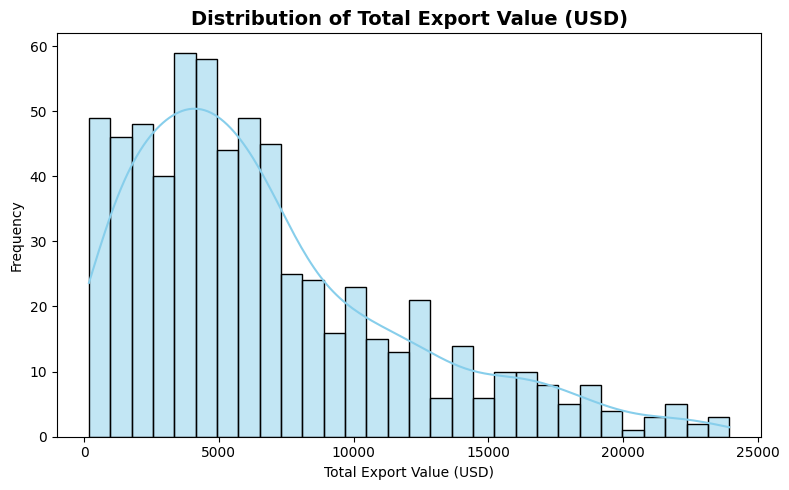

In [42]:
# Distribution of total export value
plt.figure(figsize=(8,5))
sns.histplot(merged_df["Total_Value_USD"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Export Value (USD)", fontsize=14, fontweight="bold")
plt.xlabel("Total Export Value (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("visualization_total_value_distribution.png", dpi=300)
plt.show()


In [ ]:
# P.S. I used ChatGPT to create this project.